In [4]:
import pandas as pd
import numpy as np
import math
import pandas_profiling as pp
import warnings
warnings.filterwarnings('ignore')

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('fivethirtyeight')

In [6]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [7]:
fake_train = train[train["is_fake"] == 1]
true_train = train[train["is_fake"] == 0]

In [8]:
sample = pd.read_csv("sample_submission.csv")

In [9]:
train['date_created'] = pd.to_datetime(train['date_created'])
test['date_created'] = pd.to_datetime(test['date_created'])

In [10]:
train['user_date_created'] = pd.to_datetime(train['user_date_created'])
test['user_date_created'] = pd.to_datetime(test['user_date_created'])

In [11]:
pp.ProfileReport(train)

Number of variables,11
Number of observations,1281499
Total Missing (%),3.2%
Total size in memory,99.0 MiB
Average record size in memory,81.0 B
Numeric,4
Categorical,3
Boolean,1
Date,2
Text (Unique),0
Rejected,1


In [12]:
pp.ProfileReport(test)

Number of variables,11
Number of observations,252099
Total Missing (%),10.0%
Total size in memory,21.2 MiB
Average record size in memory,88.0 B
Numeric,4
Categorical,4
Boolean,0
Date,2
Text (Unique),0
Rejected,1


In [13]:
train.head()

,comment_id,company_id,user_id,product_id,comment,rating,date_created,user_date_created,user_ip,user_agent,is_fake
0,1,2169053,91933,6.0,компания не выполнила заказ без обьяснения пр...,1,2014-10-23 20:26:44,2010-02-03 21:03:22,178.92.70.220,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,False
1,2,709306,91933,2.0,"Впервые встретился такой професиональный, отве...",5,2016-12-10 08:38:27,2010-02-03 21:03:22,94.179.59.162,Mozilla/5.0 (Linux; Android 5.1.1; C6602 Build...,False
2,3,35287,91933,NaN,"Несерйозная, некоректная менеджер інтернет маг...",1,2017-02-11 15:55:14,2010-02-03 21:03:22,37.73.137.188,Mozilla/5.0 (Linux; Android 6.0; ASUS_X008D Bu...,False
3,4,1778322,91933,1.0,"Не рекомендую. Не отвечают, не выполняют заказы.",1,2017-06-26 18:00:45,2010-02-03 21:03:22,37.73.149.180,Mozilla/5.0 (Linux; Android 6.0; ASUS_X008D Bu...,False
4,5,2821533,91933,NaN,"На письма не отвечают, заказы не выполняют. Не...",1,2017-07-06 16:57:40,2010-02-03 21:03:22,37.73.221.126,Mozilla/5.0 (Linux; Android 6.0; ASUS_X008D Bu...,False


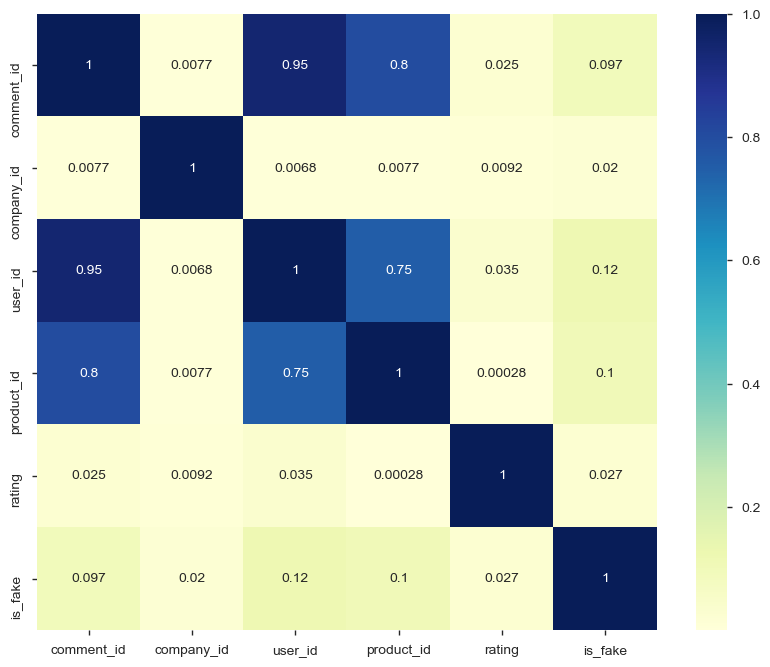

In [14]:
corr=train.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True, cmap="YlGnBu")

## Short IP

In [ ]:
train["short_id"] = [el.split(".")[0]+"."+ el.split(".")[1] if len(el.split(".")) > 1 else el.split(".")[0] for el in train["user_ip"].astype("str")]

In [ ]:
train["short_id"].head()

In [ ]:
test["short_id"] = [el.split(".")[0]+"."+ el.split(".")[1] if len(el.split(".")) > 1 else el.split(".")[0] for el in test["user_ip"].astype("str")]

In [ ]:
id_df = pd.DataFrame(index=train["short_id"].unique())
id_df["False"]=[train[(train["short_id"] == cur_id) & train["is_fake"]].shape[0] for cur_id in train["short_id"].unique()]

In [ ]:
id_df.columns = ["False"]
id_df["True"]=[train[(train["short_id"] == cur_id) & (train["is_fake"] == 0)].shape[0] for cur_id in train["short_id"].unique()]

In [ ]:
id_df["f_norm"] = [el["False"] / (el["True"] + el["False"]) for ind, el in id_df.iterrows()]

In [ ]:
train["ip_false"] = [id_df.loc[el]["f_norm"] for el in train["short_id"]]

In [ ]:
test["ip_false"] = [id_df.loc[el]["f_norm"] if el in id_df.index else -1 for el in test["short_id"]]

In [ ]:
id_df.shape

In [ ]:
id_df[id_df["f_norm"] >= 0.5].shape

In [ ]:
badcount = sum(id_df[id_df["f_norm"] >= 0.5]["False"])
display(badcount)
badcount_all = sum(id_df[id_df["f_norm"] >= 0.5]["False"]) + sum(id_df[id_df["f_norm"] >= 0.5]["True"])
display(badcount_all)

display(train[train["is_fake"] == 1].shape[0])
display(train.shape[0])

In [ ]:
corr=train.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True, cmap="YlGnBu")

In [ ]:
train["ip_false"].to_csv(path = "train_ip.csv",header = True, index_label = True)

In [ ]:
test["ip_false"].to_csv(path = "test_ip.csv",header = True, index_label = True)

## ID Advanced

In [46]:
fake_ips = fake_train["user_ip"].sort_values().unique()

In [47]:
fake_ips

array(['104.200.24.17', '109.104.168.220', '109.163.234.8',
       '109.254.49.24', '119.81.109.51', '119.81.109.59', '119.81.109.62',
       '121.100.143.159', '121.100.143.169', '122.152.167.12',
       '122.152.167.190', '124.109.1.207', '128.52.128.105',
       '130.180.208.8', '130.180.209.195', '130.180.211.57',
       '130.180.212.133', '130.180.212.175', '130.180.212.32',
       '130.180.212.74', '134.249.177.32', '136.0.98.173', '136.0.98.177',
       '136.0.98.18', '136.0.98.52', '139.162.250.124', '139.59.121.220',
       '141.101.8.14', '141.255.189.161', '142.44.166.241',
       '142.91.189.91', '142.91.189.93', '146.185.27.139',
       '149.154.152.177', '151.1.216.179', '151.80.254.227',
       '159.122.105.116', '159.122.105.124', '159.122.86.186',
       '159.203.47.229', '161.202.89.230', '162.220.246.230',
       '163.172.170.161', '163.172.191.54', '163.172.217.50',
       '166.88.123.67', '167.114.77.220', '171.25.193.132',
       '173.208.213.114', '173.239.230.3'

In [48]:
def ip_to_bool (str_ip):
    aim = ''
    for part in str_ip.split("."):
        aim = aim + '{0:08b}'.format(int(part))
    return aim

In [49]:
fake_bin_id = ["" for el in range(len(fake_ips))]

for el, ind in zip(fake_ips, np.arange(len(fake_ips))):
    aim = ''
    for part in el.split("."):
        #print(part)
        aim = aim + '{0:08b}'.format(int(part))
        fake_bin_id[ind] = aim
fake_bin_id

['01101000110010000001100000010001',
 '01101101011010001010100011011100',
 '01101101101000111110101000001000',
 '01101101111111100011000100011000',
 '01110111010100010110110100110011',
 '01110111010100010110110100111011',
 '01110111010100010110110100111110',
 '01111001011001001000111110011111',
 '01111001011001001000111110101001',
 '01111010100110001010011100001100',
 '01111010100110001010011110111110',
 '01111100011011010000000111001111',
 '10000000001101001000000001101001',
 '10000010101101001101000000001000',
 '10000010101101001101000111000011',
 '10000010101101001101001100111001',
 '10000010101101001101010010000101',
 '10000010101101001101010010101111',
 '10000010101101001101010000100000',
 '10000010101101001101010001001010',
 '10000110111110011011000100100000',
 '10001000000000000110001010101101',
 '10001000000000000110001010110001',
 '10001000000000000110001000010010',
 '10001000000000000110001000110100',
 '10001011101000101111101001111100',
 '10001011001110110111100111011100',
 

In [50]:
fake_bin_id[0]

'01101000110010000001100000010001'

In [96]:
fake_id_values = []
first_r = True
last_comp = fake_bin_id[0]

for elem in fake_bin_id:
    
    if first_r:
        first_r = False
        last_comp = elem
        continue
        
    same = 0
    
    for i in range(min([len(elem), len(last_comp)])):
        if elem[i] != last_comp[i]: break
        same = same + 1
        
    if same < 12:
        fake_id_values.append(last_comp)
        last_comp = elem
        continue
    
    last_comp = last_comp[:same]
        
        
fake_id_values

['01101000110010000001100000010001',
 '01101101011010001010100011011100',
 '01101101101000111110101000001000',
 '01101101111111100011000100011000',
 '0111011101010001011011010011',
 '01111001011001001000111110',
 '011110101001100010100111',
 '01111100011011010000000111001111',
 '10000000001101001000000001101001',
 '100000101011010011010',
 '10000110111110011011000100100000',
 '100010000000000001100010',
 '10001011101000101111101001111100',
 '10001011001110110111100111011100',
 '10001101011001010000100000001110',
 '10001101111111111011110110100001',
 '10001110001011001010011011110001',
 '10001110010110111011110101011',
 '10010010101110010001101110001011',
 '10010101100110101001100010110001',
 '10010111000000011101100010110011',
 '10010111010100001111111011100011',
 '100111110111101001',
 '10011111110010110010111111100101',
 '10100001110010100101100111100110',
 '10100010110111001111011011100110',
 '10100011101011001',
 '10100110010110000111101101000011',
 '1010011101110010010011011101110

In [97]:
fake_id_values = [el if (len(el) != 32) else el[:28] for el in fake_id_values]
fake_id_values

['0110100011001000000110000001',
 '0110110101101000101010001101',
 '0110110110100011111010100000',
 '0110110111111110001100010001',
 '0111011101010001011011010011',
 '01111001011001001000111110',
 '011110101001100010100111',
 '0111110001101101000000011100',
 '1000000000110100100000000110',
 '100000101011010011010',
 '1000011011111001101100010010',
 '100010000000000001100010',
 '1000101110100010111110100111',
 '1000101100111011011110011101',
 '1000110101100101000010000000',
 '1000110111111111101111011010',
 '1000111000101100101001101111',
 '10001110010110111011110101011',
 '1001001010111001000110111000',
 '1001010110011010100110001011',
 '1001011100000001110110001011',
 '1001011101010000111111101110',
 '100111110111101001',
 '1001111111001011001011111110',
 '1010000111001010010110011110',
 '1010001011011100111101101110',
 '10100011101011001',
 '1010011001011000011110110100',
 '1010011101110010010011011101',
 '1010101100011001110000011000',
 '1010110111010000110101010111',
 '101011011110

In [98]:
train["boolean_ip"] = [ip_to_bool(el) if not isinstance(el,float) else "n" for el in train["user_ip"]] 

In [99]:
test["boolean_ip"] = [ip_to_bool(el) if not isinstance(el,float) else "n" for el in test["user_ip"]] 

In [100]:
true_train["boolean_ip"] = [ip_to_bool(el) if not isinstance(el,float) else "n" for el in true_train["user_ip"]] 
fake_train["boolean_ip"] = [ip_to_bool(el) if not isinstance(el,float) else "n" for el in fake_train["user_ip"]] 

In [101]:
#train["boolean_ip"]

In [102]:
fake_df = pd.DataFrame(index = fake_id_values)

In [103]:
fake_df['true'] = [true_train[ [el.startswith(cur_ip) if not isinstance(el,float) else 0 for el in true_train["boolean_ip"]] ].shape[0] for cur_ip in fake_df.index]
fake_df['false'] = [fake_train[ [el.startswith(cur_ip) if not isinstance(el,float) else 0 for el in fake_train["boolean_ip"]] ].shape[0] for cur_ip in fake_df.index]

In [104]:
fake_df['total'] = fake_df['true'] + fake_df['false']

In [105]:
fake_df['f_norm'] = fake_df['false'] / fake_df['total']

In [106]:
#fake_df

In [107]:
ip_true = []
ip_false = []
ip_norm = []
ip_total = []

for ind, row in train.iterrows():
    found = False
    for fake in fake_id_values:
        if row["boolean_ip"].startswith(fake):
            nerow = fake_df.loc[fake]
            ip_true.append(nerow["true"])
            ip_false.append(nerow["false"])
            ip_norm.append(nerow["f_norm"])
            ip_total.append(nerow["total"])
            found = True
            break
        
    if (not found):
        ip_true.append(1)
        ip_false.append(0)
        ip_norm.append(0)
        ip_total.append(1)

In [108]:
ip_false

[279.0,
 92.0,
 0,
 0,
 0,
 4.0,
 0,
 4.0,
 0,
 51.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 30.0,
 30.0,
 0,
 0,
 0,
 30.0,
 0,
 0,
 0,
 0,
 0,
 0,
 8.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 92.0,
 12.0,
 0,
 92.0,
 0,
 0,
 0,
 0,
 30.0,
 92.0,
 0,
 0,
 0,
 0,
 279.0,
 0,
 0,
 0,
 0,
 0,
 12.0,
 4.0,
 279.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 92.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 10.0,
 0,
 0,
 0,
 0,
 10.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 10.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 10.0,
 0,
 0,
 0,
 10.0,
 0,
 0,
 10.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 26.0,
 26.0,
 26.0,
 0,
 0,
 26.0,
 452.0,
 26.0,
 31.0,
 0,
 0,
 0,
 0,
 0,
 4.0,
 6.0,
 6.0,
 4.0,
 4.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 12.0,
 452.0,
 0,
 0,
 279.0,
 0,
 0,
 0,
 0,
 0,
 4.0,
 26.0,
 279.0,
 279.0,
 279.0,
 279.0,
 279.0,
 10.0,
 279.0,
 452.0,
 279.0,
 279.0,
 279.0,
 452.0,
 279.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 10.0,
 0,
 26.0,
 0,
 0,
 0,
 0,
 0,
 26.0,
 0,
 0

In [109]:
display(len(ip_true))
train.shape[0]

1281499

1281499

In [110]:
train["ip_true_values"] = ip_true
train["ip_false_values"] = ip_false
train["ip_false_norm"] = ip_norm
train["ip_total_values"] = ip_total

In [111]:
pp.ProfileReport(train)

Number of variables,23
Number of observations,1281499
Total Missing (%),1.5%
Total size in memory,216.3 MiB
Average record size in memory,177.0 B
Numeric,10
Categorical,4
Boolean,1
Date,2
Text (Unique),0
Rejected,6


In [ ]:
ip_true = []
ip_false = []
ip_norm = []
ip_total = []

for ind, row in test.iterrows():
    found = False
    for fake in fake_id_values:
        if row["boolean_ip"].startswith(fake):
            nerow = fake_df.loc[fake]
            ip_true.append(nerow["true"])
            ip_false.append(nerow["false"])
            ip_norm.append(nerow["f_norm"])
            ip_total.append(nerow["total"])
            found = True
            break
        
    if (not found):
        ip_true.append(1)
        ip_false.append(0)
        ip_norm.append(0)
        ip_total.append(1)

In [ ]:
len(ip_true)

In [ ]:
test["ip_true_values"] = ip_true
test["ip_false_values"] = ip_false
test["ip_false_norm"] = ip_norm
test["ip_total_values"] = ip_total

In [ ]:
corr=train.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True, cmap="YlGnBu")

In [ ]:
output_train = pd.DataFrame(index = train.index)
output_test = pd.DataFrame(index = test.index)

In [ ]:
output_train["ip_true_values"] = train["ip_true_values"]
output_train["ip_false_values"] = train["ip_false_values"]
output_train["ip_false_norm"] = train["ip_false_norm"]
output_train["ip_total_values"] = train["ip_total_values"]

In [ ]:
output_test["ip_true_values"] = test["ip_true_values"]
output_test["ip_false_values"] = test["ip_false_values"]
output_test["ip_false_norm"] = test["ip_false_norm"]
output_test["ip_total_values"] = test["ip_total_values"]

In [ ]:
output_train.to_csv(path_or_buf="new_ip_train.csv",header = True)

In [ ]:
output_test.to_csv(path_or_buf= "new_ip_test.csv",header = True)

## Company

company_id -> amount, good, bad, sootn, av_rate, product_amount
product_id -> ...
ip

In [121]:
un = train["company_id"].value_counts()
ui_df = pd.DataFrame(index=[el for el in un.index if (un[el] > 0)])

In [122]:
len([el for el in un.index if (un[el] > 0)])

60497

In [123]:
ui_df["False"]=[fake_train[(fake_train["company_id"] == cur_id)].shape[0] for cur_id in ui_df.index]

In [124]:
ui_df["True"]=[true_train[(true_train["company_id"] == cur_id)].shape[0] for cur_id in ui_df.index]

In [125]:
ui_df["overall"]=ui_df["True"]+ui_df["False"]

In [126]:
ui_df["f_norm"] = [el["False"] / (el["True"] + el["False"]) for ind, el in ui_df.iterrows()]

In [127]:
ui_df["rate_total"]=[sum(true_train[(true_train["company_id"] == cur_id)]["rating"]) for cur_id in ui_df.index]

In [128]:
ui_df["average_rate"]=ui_df["rate_total"] / ui_df["overall"]

In [129]:
train["ui_false"] = [ui_df.loc[el]["f_norm"] for el in train["company_id"]]

In [130]:
test["ui_false"] = [ui_df.loc[el]["f_norm"] if el in ui_df.index else -1 for el in test["company_id"]]

In [131]:
train['comp_true'] = [ui_df.loc[el]["True"] for el in train["company_id"]]
train['comp_false'] = [ui_df.loc[el]["False"] for el in train["company_id"]]

In [132]:
test['comp_true'] = [ui_df.loc[el]["True"] if el in ui_df.index else -1 for el in test["company_id"]]
test['comp_false'] = [ui_df.loc[el]["False"] if el in ui_df.index else -1 for el in test["company_id"]]

In [133]:
train['comp_all'] = [ui_df.loc[el]["overall"] for el in train["company_id"]]
test['comp_all'] = [ui_df.loc[el]["overall"] if el in ui_df.index else -1 for el in test["company_id"]]

In [134]:
train['summary_rate'] = [ui_df.loc[el]["rate_total"] for el in train["company_id"]]
test['summary_rate'] = [ui_df.loc[el]["rate_total"] if el in ui_df.index else -1 for el in test["company_id"]]

KeyboardInterrupt: 

In [ ]:
train['average_rate'] = [ui_df.loc[el]["average_rate"] for el in train["company_id"]]
test['average_rate'] = [ui_df.loc[el]["average_rate"] if el in ui_df.index else -1 for el in test["company_id"]]

In [ ]:
train['company_rating_difference'] = [-1 for ind in range(train.shape[0])]
test['company_rating_difference'] = test["rating"]-test["average_rate"]

In [ ]:
train['company_rating_difference'] = (train["rating"]-train["average_rate"])[train["average_rate"] != -1]
test['company_rating_difference'] = (test["rating"]-test["average_rate"])[train["average_rate"] != -1]

In [ ]:
train.corr()

In [ ]:
company_output_train = pd.DataFrame(index=train.index)
company_output_train["company_true"] = train['comp_true']
company_output_train["company_false"] = train['comp_false']
company_output_train["company_overall"] = train['comp_all']
company_output_train["company_false_normalized"] = train['ui_false']
company_output_train["company_rate_total"] = train['summary_rate']
company_output_train["company_average_rate"] = train['average_rate']
company_output_train['company_rating_difference']=train['company_rating_difference']

In [ ]:
company_output_test = pd.DataFrame(index=test.index)
company_output_test["company_true"] = test['comp_true']
company_output_test["company_false"] = test['comp_false']
company_output_test["company_overall"] = test['comp_all']
company_output_test["company_overall"] = company_output_test["company_overall"].replace(to_replace=-2, value=-1)
company_output_test["company_false_normalized"] = test['ui_false']
company_output_test["company_rate_total"] = test['summary_rate']
company_output_test["company_average_rate"] = test['average_rate']
company_output_test['company_rating_difference'] = test['company_rating_difference']

In [ ]:
company_output_test[company_output_test['company_overall'] == -1].shape[0]

In [ ]:
company_output_train.to_csv(path_or_buf= "company_train.csv",header = True)
company_output_test.to_csv(path_or_buf= "company_test.csv",header = True)

In [ ]:
corr=train.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True, cmap="YlGnBu")

## Product

company_id -> amount, good, bad, sootn, av_rate, product_amount
product_id -> ...
ip

In [46]:
un = train["product_id"].value_counts()
un

1805.0       142
16009.0      124
13744.0      103
5687.0        94
7998.0        72
12336.0       72
5299.0        68
16671.0       63
7876.0        61
1226149.0     56
2685.0        53
12099.0       51
46448.0       50
1221937.0     50
969378.0      49
28523.0       49
27552.0       48
4720.0        48
59275.0       48
31862.0       48
15390.0       47
540.0         47
5532.0        47
20260.0       46
57177.0       46
8390.0        45
23064.0       44
1226152.0     43
1221368.0     42
21824.0       42
            ... 
821270.0       1
821269.0       1
821268.0       1
821265.0       1
821257.0       1
821254.0       1
821253.0       1
821252.0       1
821247.0       1
821244.0       1
821283.0       1
821286.0       1
821323.0       1
821287.0       1
821322.0       1
821319.0       1
821316.0       1
821315.0       1
821314.0       1
821313.0       1
51332.0        1
821311.0       1
821310.0       1
821306.0       1
821302.0       1
821301.0       1
821292.0       1
821291.0      

In [47]:
[el for el in un.iteritems()]

[(1805.0, 142),
 (16009.0, 124),
 (13744.0, 103),
 (5687.0, 94),
 (7998.0, 72),
 (12336.0, 72),
 (5299.0, 68),
 (16671.0, 63),
 (7876.0, 61),
 (1226149.0, 56),
 (2685.0, 53),
 (12099.0, 51),
 (46448.0, 50),
 (1221937.0, 50),
 (969378.0, 49),
 (28523.0, 49),
 (27552.0, 48),
 (4720.0, 48),
 (59275.0, 48),
 (31862.0, 48),
 (15390.0, 47),
 (540.0, 47),
 (5532.0, 47),
 (20260.0, 46),
 (57177.0, 46),
 (8390.0, 45),
 (23064.0, 44),
 (1226152.0, 43),
 (1221368.0, 42),
 (21824.0, 42),
 (1220332.0, 42),
 (14058.0, 41),
 (50013.0, 41),
 (48789.0, 41),
 (1792.0, 40),
 (1220860.0, 40),
 (6230.0, 40),
 (171646.0, 40),
 (44833.0, 40),
 (18467.0, 40),
 (15112.0, 38),
 (6899.0, 38),
 (45499.0, 38),
 (21320.0, 37),
 (1218994.0, 37),
 (10431.0, 37),
 (1222542.0, 37),
 (660.0, 36),
 (2321.0, 36),
 (18773.0, 36),
 (1203732.0, 36),
 (7879.0, 35),
 (4510.0, 35),
 (31831.0, 35),
 (6799.0, 34),
 (1226469.0, 34),
 (11570.0, 34),
 (25666.0, 34),
 (25810.0, 33),
 (47844.0, 33),
 (15234.0, 33),
 (7973.0, 33),
 (19

In [18]:
train_unique = train["product_id"].value_counts().index
train_unique

Float64Index([   1805.0,   16009.0,   13744.0,    5687.0,    7998.0,   12336.0,
                 5299.0,   16671.0,    7876.0, 1226149.0,
              ...
                51332.0,  821311.0,  821310.0,  821306.0,  821302.0,  821301.0,
               821292.0,  821291.0,  821290.0,       2.0],
             dtype='float64', length=673098)

In [19]:
un = pd.Series({tupl[0]:tupl[1] for tupl in test["product_id"].value_counts().iteritems() if tupl[0] in train_unique})
un.shape

(21709,)

In [ ]:
un_lim = un[un.values > 20]
un_lim.shape

In [21]:
ui_df = pd.DataFrame(index=un.index)

In [22]:
len([el for el in un.index if (un[el] > 0)])

21709

In [23]:
ui_df["False"]=[fake_train[(fake_train["product_id"] == cur_id)].shape[0] for cur_id in ui_df.index]

In [24]:
ui_df["True"]=[true_train[(true_train["product_id"] == cur_id)].shape[0] for cur_id in ui_df.index]

In [25]:
ui_df["overall"]=ui_df["True"]+ui_df["False"]

In [26]:
ui_df["f_norm"] = [el["False"] / (el["True"] + el["False"]) for ind, el in ui_df.iterrows()]

In [27]:
ui_df["rate_total"]=[sum(true_train[(true_train["product_id"] == cur_id)]["rating"]) for cur_id in ui_df.index]

In [28]:
ui_df["average_rate"]=ui_df["rate_total"] / ui_df["overall"]

In [30]:
train["ui_false"] = [ui_df.loc[el]["f_norm"] if el in ui_df.index else -1 for el in train["product_id"]]

In [31]:
test["ui_false"] = [ui_df.loc[el]["f_norm"] if el in ui_df.index else -1 for el in test["product_id"]]

In [32]:
train['prod_true'] = [ui_df.loc[el]["True"] if el in ui_df.index else -1 for el in train["product_id"]]
train['prod_false'] = [ui_df.loc[el]["False"] if el in ui_df.index else -1 for el in train["product_id"]]

In [33]:
test['prod_true'] = [ui_df.loc[el]["True"] if el in ui_df.index else -1 for el in test["product_id"]]
test['prod_false'] = [ui_df.loc[el]["False"] if el in ui_df.index else -1 for el in test["product_id"]]

In [34]:
train['prod_all'] = [ui_df.loc[el]["overall"] if el in ui_df.index else -1 for el in train["product_id"]]
test['prod_all'] = [ui_df.loc[el]["overall"] if el in ui_df.index else -1 for el in test["product_id"]]

In [35]:
train['summary_rate'] = [ui_df.loc[el]["rate_total"] if el in ui_df.index else -1 for el in train["product_id"]]
test['summary_rate'] = [ui_df.loc[el]["rate_total"] if el in ui_df.index else -1 for el in test["product_id"]]

In [36]:
train['average_rate'] = [ui_df.loc[el]["average_rate"] if el in ui_df.index else -1 for el in train["product_id"]]
test['average_rate'] = [ui_df.loc[el]["average_rate"] if el in ui_df.index else -1 for el in test["product_id"]]

In [37]:
train['product_rating_difference'] = train["rating"]-train["average_rate"]
test['product_rating_difference'] = test["rating"]-test["average_rate"]

In [38]:
train.corr()

,comment_id,company_id,user_id,product_id,rating,is_fake,ui_false,prod_true,prod_false,prod_all,summary_rate,average_rate,product_rating_difference
comment_id,1.000000,0.007737,0.945726,0.802164,0.025298,0.096783,0.043177,0.000482,0.045694,0.000926,-0.001612,0.039832,-0.009385
company_id,0.007737,1.000000,0.006817,0.007686,0.009180,0.020309,0.002438,0.004420,0.003191,0.004507,0.004740,0.001878,0.005515
user_id,0.945726,0.006817,1.000000,0.753244,0.035457,0.120007,0.047485,0.000090,0.051073,0.000661,-0.002174,0.043190,-0.004190
product_id,0.802164,0.007686,0.753244,1.000000,0.000280,0.103157,-0.143508,-0.142046,-0.132260,-0.141539,-0.137873,-0.148615,0.119188
rating,0.025298,0.009180,0.035457,0.000280,1.000000,0.026522,0.044824,0.027305,0.043546,0.027377,0.028259,0.056284,0.705975
is_fake,0.096783,0.020309,0.120007,0.103157,0.026522,1.000000,0.026199,-0.004529,0.060384,-0.000931,-0.005165,-0.006589,0.024457
ui_false,0.043177,0.002438,0.047485,-0.143508,0.044824,0.026199,1.000000,0.545232,0.978737,0.547489,0.506914,0.984377,-0.664845
prod_true,0.000482,0.004420,0.000090,-0.142046,0.027305,-0.004529,0.545232,1.000000,0.522344,0.999838,0.997947,0.550309,-0.370002
prod_false,0.045694,0.003191,0.051073,-0.132260,0.043546,0.060384,0.978737,0.522344,1.000000,0.528144,0.484970,0.943599,-0.636872
prod_all,0.000926,0.004507,0.000661,-0.141539,0.027377,-0.000931,0.547489,0.999838,0.528144,1.000000,0.997708,0.550513,-0.370092


In [40]:
product_output_train = pd.DataFrame(index=train.index)
product_output_train["product_true"] = train['prod_true']
product_output_train["product_false"] = train['prod_false']
product_output_train["product_overall"] = train['prod_all']
product_output_train["product_overall"] = product_output_train["product_overall"].replace(to_replace=-2, value=-1)
product_output_train["product_false_normalized"] = train['ui_false']
product_output_train["product_rate_total"] = train['summary_rate']
product_output_train["product_average_rate"] = train['average_rate']
product_output_train['product_rating_difference']=train['product_rating_difference']

In [41]:
product_output_test = pd.DataFrame(index=test.index)
product_output_test["product_true"] = test['prod_true']
product_output_test["product_false"] = test['prod_false']
product_output_test["product_overall"] = test['prod_all']
product_output_test["product_overall"] = product_output_test["product_overall"].replace(to_replace=-2, value=-1)
product_output_test["product_false_normalized"] = test['ui_false']
product_output_test["product_rate_total"] = test['summary_rate']
product_output_test["product_average_rate"] = test['average_rate']
product_output_test['product_rating_difference'] = test['product_rating_difference']

In [45]:
product_output_test[product_output_test['product_overall'] != -1].shape[0]

29736

In [43]:
product_output_train.to_csv(path_or_buf= "product_train.csv",header = True)
product_output_test.to_csv(path_or_buf= "product_test.csv",header = True)

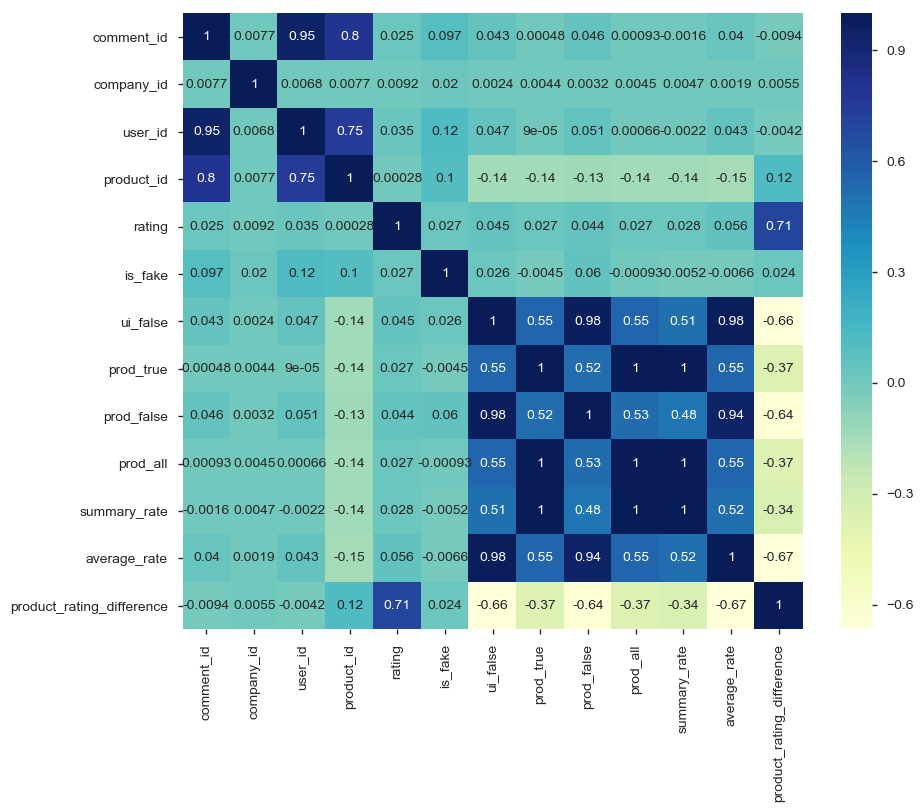

In [44]:
corr=train.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True, cmap="YlGnBu")

## Company?

In [ ]:
list_ = train["company_id"].value_counts()
len(list_[list_.values > 60])

In [ ]:
sum(list_[list_.values>60].values)

In [ ]:
train.shape[0]

## Other

In [ ]:
feat = train["short_id"]
x = feat.value_counts()

In [ ]:
display(x.shape)
x.head()

In [ ]:
#for cur_id in train["short_id"].unique():
   # cur_train = train[(train["short_id"] == cur_id)]["is_fake"]
    #id_df.iloc[cur_id] = cur_train.value_counts()

In [ ]:
chosen = x[x.values > 1]
chosen.head()

In [ ]:
#train[feat == x.index[0]]['is_fake'].value_counts()
#res = np.array([])
#for el in chosen.index:
    #display(train[feat == el]['is_fake'].value_counts())

In [ ]:
plt.figure(figsize=(10,5))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("# per class")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [ ]:
test["ip_false"].tail()